In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score,
    classification_report, confusion_matrix
)

## 1. Data Loading & Exploration

In [2]:
# Load the dataset
car_df = pd.read_csv('global_cars_enhanced.csv')

# Display first few rows
print('First 5 rows:')
print(car_df.head())

First 5 rows:
     Car_ID     Brand  Manufacture_Year  Body_Type Fuel_Type Transmission  \
0  CAR_0001  Mercedes              2006        SUV    Petrol       Manual   
1  CAR_0002    Nissan              2023      Coupe    Petrol    Automatic   
2  CAR_0003    Nissan              2007  Hatchback    Diesel       Manual   
3  CAR_0004    Nissan              2013      Coupe    Petrol       Manual   
4  CAR_0005   Hyundai              2009  Hatchback    Hybrid    Automatic   

   Engine_CC  Horsepower  Mileage_km_per_l  Price_USD Manufacturing_Country  \
0       4089         547                17      73407                   USA   
1       4618         167                25      79370                   USA   
2       1802         110                16      76549                 China   
3       1835         373                16      48722                   USA   
4       2332         145                28      83265                    UK   

   Car_Age Price_Category  HP_per_CC Age_Categor

In [3]:
# Dataset info
print(car_df.info())

<class 'pandas.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_ID                 300 non-null    str    
 1   Brand                  300 non-null    str    
 2   Manufacture_Year       300 non-null    int64  
 3   Body_Type              300 non-null    str    
 4   Fuel_Type              300 non-null    str    
 5   Transmission           300 non-null    str    
 6   Engine_CC              300 non-null    int64  
 7   Horsepower             300 non-null    int64  
 8   Mileage_km_per_l       300 non-null    int64  
 9   Price_USD              300 non-null    int64  
 10  Manufacturing_Country  300 non-null    str    
 11  Car_Age                300 non-null    int64  
 12  Price_Category         300 non-null    str    
 13  HP_per_CC              300 non-null    float64
 14  Age_Category           300 non-null    str    
 15  Efficiency_Score 

In [4]:
# Check for missing values
print('Missing values:')
print(car_df.isnull().sum())

Missing values:
Car_ID                   0
Brand                    0
Manufacture_Year         0
Body_Type                0
Fuel_Type                0
Transmission             0
Engine_CC                0
Horsepower               0
Mileage_km_per_l         0
Price_USD                0
Manufacturing_Country    0
Car_Age                  0
Price_Category           0
HP_per_CC                0
Age_Category             0
Efficiency_Score         0
dtype: int64


In [5]:
# Summary statistics
print('Summary statistics:')
print(car_df.describe())

Summary statistics:
       Manufacture_Year    Engine_CC  Horsepower  Mileage_km_per_l  \
count        300.000000   300.000000  300.000000        300.000000   
mean        2015.123333  3052.880000  328.346667         19.716667   
std            5.966023  1117.937497  153.202644          6.028061   
min         2005.000000  1001.000000   70.000000         10.000000   
25%         2010.000000  2074.000000  188.250000         15.000000   
50%         2015.000000  3117.500000  329.500000         19.500000   
75%         2020.000000  3964.000000  454.750000         24.000000   
max         2025.000000  4994.000000  599.000000         30.000000   

           Price_USD     Car_Age   HP_per_CC  Efficiency_Score  
count     300.000000  300.000000  300.000000        300.000000  
mean    60848.823333   10.876667    0.129559          0.485833  
std     34445.525598    5.966023    0.093239          0.301403  
min      5221.000000    1.000000    0.017800          0.000000  
25%     29418.500000    

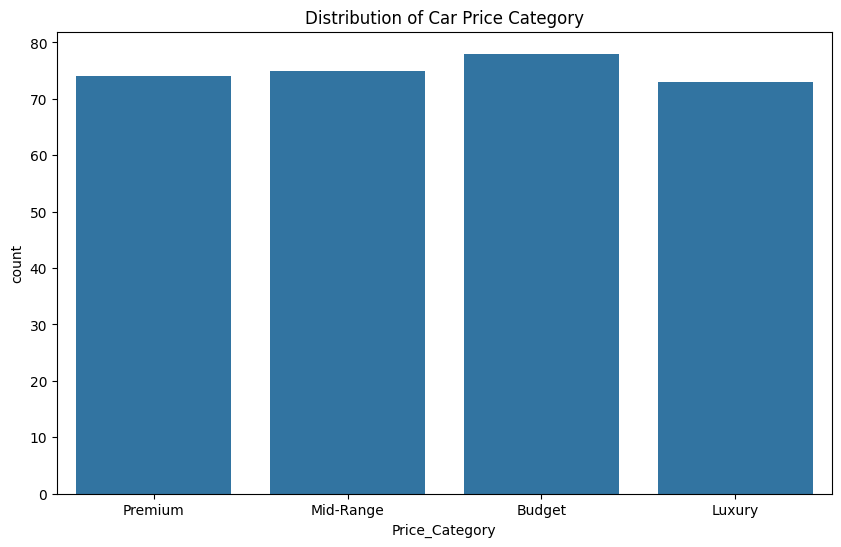

Price_Category
Budget       78
Mid-Range    75
Premium      74
Luxury       73
Name: count, dtype: int64


In [6]:
# Visualize Price_Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_Category', data=car_df)
plt.title('Distribution of Car Price Category')
plt.show()
print(car_df['Price_Category'].value_counts())

## 2. Preprocessing

In [7]:
# Drop Car_ID column (not useful for classification)
car_df = car_df.drop('Car_ID', axis=1)

# Drop Price_USD column (would leak the target)
if 'Price_USD' in car_df.columns:
    car_df = car_df.drop('Price_USD', axis=1)

# Encode all remaining categorical (object) columns using LabelEncoder
label_encoders = {}
for col in car_df.select_dtypes(include=['object']).columns:
    if col == 'Price_Category':
        continue
    le = LabelEncoder()
    car_df[col] = le.fit_transform(car_df[col])
    label_encoders[col] = le
    print(f'Encoded column: {col}')

print('\nDataFrame after encoding:')
print(car_df.head())

Encoded column: Brand
Encoded column: Body_Type
Encoded column: Fuel_Type
Encoded column: Transmission
Encoded column: Manufacturing_Country
Encoded column: Age_Category

DataFrame after encoding:
   Brand  Manufacture_Year  Body_Type  Fuel_Type  Transmission  Engine_CC  \
0      6              2006          3          3             1       4089   
1      7              2023          0          3             0       4618   
2      7              2007          1          0             1       1802   
3      7              2013          0          3             1       1835   
4      4              2009          1          2             0       2332   

   Horsepower  Mileage_km_per_l  Manufacturing_Country  Car_Age  \
0         547                17                      5       20   
1         167                25                      5        3   
2         110                16                      0       19   
3         373                16                      5       13   
4    

C:\Users\hp\AppData\Local\Temp\ipykernel_19476\1733497003.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in car_df.select_dtypes(include=['object']).columns:


In [8]:
# Define features (X) and target (y)
X = car_df.drop('Price_Category', axis=1)
y = car_df['Price_Category']

# Encode the target variable for metrics that need numerical labels
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
class_names = le_target.classes_
print(f'Target classes: {class_names}')
print(f'Encoded values: {np.unique(y_encoded)}')

Target classes: ['Budget' 'Luxury' 'Mid-Range' 'Premium']
Encoded values: [0 1 2 3]


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_names = X.columns.tolist()

print(f'X_train shape: {X_train_scaled.shape}')
print(f'X_test shape: {X_test_scaled.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (240, 13)
X_test shape: (60, 13)
y_train shape: (240,)
y_test shape: (60,)


## 3. Helper Function for Evaluation Metrics

In [10]:
# Dictionary to store results for comparison
results = {}

def evaluate_model(model_name, model, X_test, y_test):
    """
    Evaluate a trained model and print all required metrics.
    Returns a dictionary of metric values.
    """
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # 1. Accuracy
    acc = accuracy_score(y_test, y_pred)

    # 2. AUC Score (One-vs-Rest for multi-class)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

    # 3. Precision (weighted average for multi-class)
    prec = precision_score(y_test, y_pred, average='weighted')

    # 4. Recall (weighted average for multi-class)
    rec = recall_score(y_test, y_pred, average='weighted')

    # 5. F1 Score (weighted average for multi-class)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # 6. Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print results
    print("=" * 55)
    print(f"  {model_name} - EVALUATION RESULTS")
    print("=" * 55)
    print(f"  Accuracy  : {acc:.4f} ({acc*100:.2f}%)")
    print(f"  AUC Score : {auc:.4f}")
    print(f"  Precision : {prec:.4f}")
    print(f"  Recall    : {rec:.4f}")
    print(f"  F1 Score  : {f1:.4f}")
    print(f"  MCC Score : {mcc:.4f}")
    print("=" * 55)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store results
    results[model_name] = {
        'Accuracy': acc,
        'AUC Score': auc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'MCC Score': mcc
    }

    return results[model_name]

## 4. Model 1 - Logistic Regression

  Logistic Regression - EVALUATION RESULTS
  Accuracy  : 0.3333 (33.33%)
  AUC Score : 0.5258
  Precision : 0.3356
  Recall    : 0.3333
  F1 Score  : 0.3299
  MCC Score : 0.1140

Classification Report:
              precision    recall  f1-score   support

      Budget       0.50      0.50      0.50        16
      Luxury       0.20      0.29      0.24        14
   Mid-Range       0.22      0.13      0.17        15
     Premium       0.40      0.40      0.40        15

    accuracy                           0.33        60
   macro avg       0.33      0.33      0.33        60
weighted avg       0.34      0.33      0.33        60



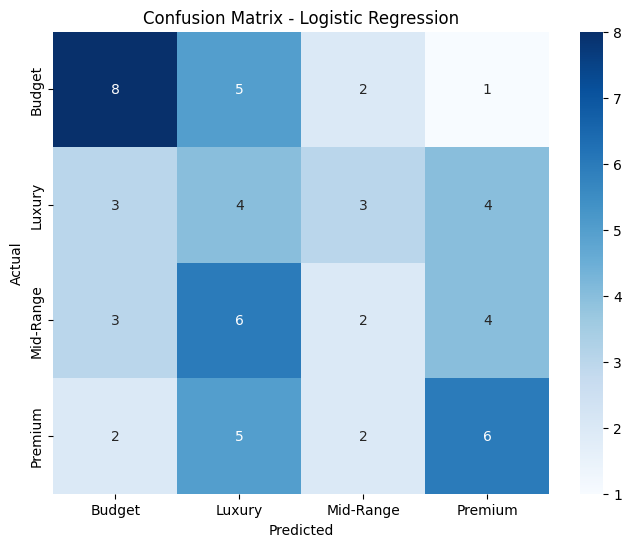

{'Accuracy': 0.3333333333333333,
 'AUC Score': 0.5258186941882594,
 'Precision': 0.33555555555555555,
 'Recall': 0.3333333333333333,
 'F1 Score': 0.3299019607843137,
 'MCC Score': 0.11395023242111041}

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train_scaled, y_train)

evaluate_model('Logistic Regression', log_reg, X_test_scaled, y_test)

## 5. Model 2 - Decision Tree Classifier

  Decision Tree - EVALUATION RESULTS
  Accuracy  : 0.3000 (30.00%)
  AUC Score : 0.5786
  Precision : 0.3084
  Recall    : 0.3000
  F1 Score  : 0.2873
  MCC Score : 0.0660

Classification Report:
              precision    recall  f1-score   support

      Budget       0.31      0.50      0.38        16
      Luxury       0.24      0.29      0.26        14
   Mid-Range       0.29      0.13      0.18        15
     Premium       0.40      0.27      0.32        15

    accuracy                           0.30        60
   macro avg       0.31      0.30      0.29        60
weighted avg       0.31      0.30      0.29        60



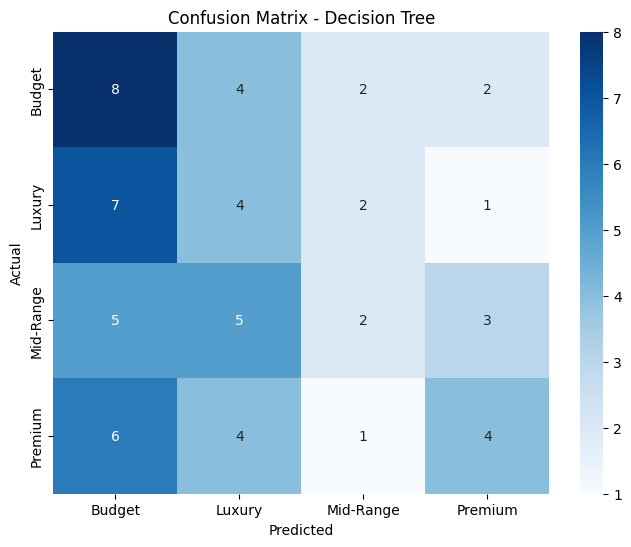

{'Accuracy': 0.3,
 'AUC Score': 0.5785626189430537,
 'Precision': 0.30838181426416716,
 'Recall': 0.3,
 'F1 Score': 0.28725690080528793,
 'MCC Score': 0.06602745768655273}

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_clf.fit(X_train_scaled, y_train)

evaluate_model('Decision Tree', dt_clf, X_test_scaled, y_test)

## 6. Model 3 - K-Nearest Neighbor Classifier

  K-Nearest Neighbors - EVALUATION RESULTS
  Accuracy  : 0.2333 (23.33%)
  AUC Score : 0.4772
  Precision : 0.2433
  Recall    : 0.2333
  F1 Score  : 0.2302
  MCC Score : -0.0226

Classification Report:
              precision    recall  f1-score   support

      Budget       0.33      0.38      0.35        16
      Luxury       0.17      0.21      0.19        14
   Mid-Range       0.18      0.20      0.19        15
     Premium       0.29      0.13      0.18        15

    accuracy                           0.23        60
   macro avg       0.24      0.23      0.23        60
weighted avg       0.24      0.23      0.23        60



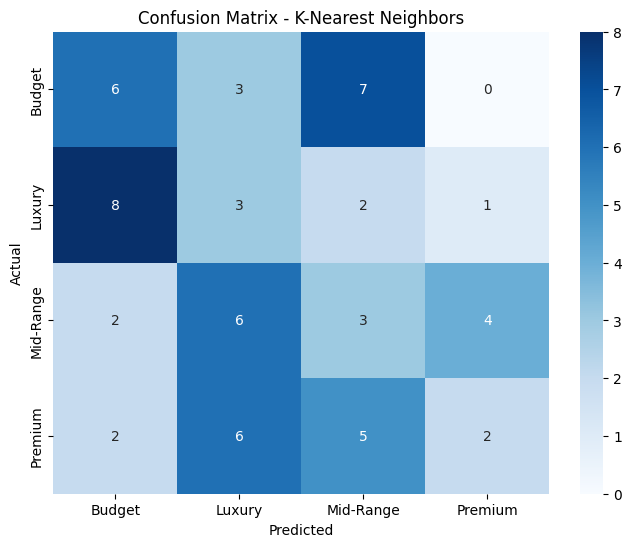

{'Accuracy': 0.23333333333333334,
 'AUC Score': 0.4772176474893866,
 'Precision': 0.2433239962651727,
 'Recall': 0.23333333333333334,
 'F1 Score': 0.23019719251336898,
 'MCC Score': -0.022593186436871773}

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski'
)
knn_clf.fit(X_train_scaled, y_train)

evaluate_model('K-Nearest Neighbors', knn_clf, X_test_scaled, y_test)

## 7. Model 4 - Naive Bayes Classifier (Gaussian)

  Gaussian Naive Bayes - EVALUATION RESULTS
  Accuracy  : 0.3167 (31.67%)
  AUC Score : 0.5328
  Precision : 0.3164
  Recall    : 0.3167
  F1 Score  : 0.3073
  MCC Score : 0.0943

Classification Report:
              precision    recall  f1-score   support

      Budget       0.44      0.44      0.44        16
      Luxury       0.25      0.43      0.32        14
   Mid-Range       0.11      0.07      0.08        15
     Premium       0.45      0.33      0.38        15

    accuracy                           0.32        60
   macro avg       0.31      0.32      0.31        60
weighted avg       0.32      0.32      0.31        60



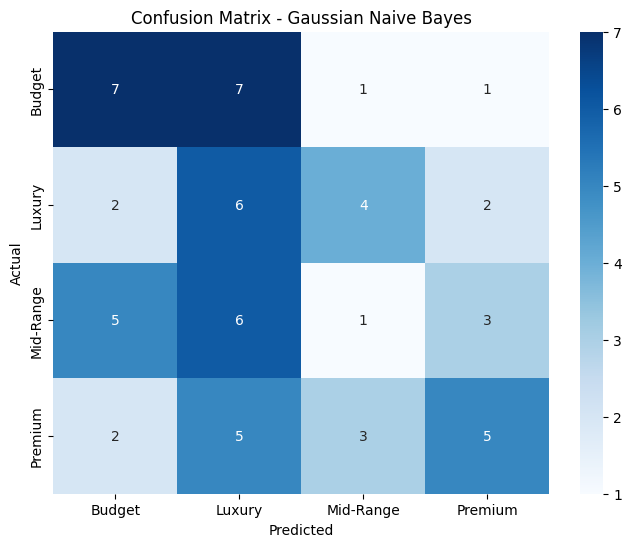

{'Accuracy': 0.31666666666666665,
 'AUC Score': 0.532770092226614,
 'Precision': 0.3164141414141414,
 'Recall': 0.31666666666666665,
 'F1 Score': 0.3073380566801619,
 'MCC Score': 0.09425456255004418}

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train_scaled, y_train)

evaluate_model('Gaussian Naive Bayes', gnb_clf, X_test_scaled, y_test)

## 8. Model 5 - Ensemble: Random Forest

  Random Forest - EVALUATION RESULTS
  Accuracy  : 0.2667 (26.67%)
  AUC Score : 0.5424
  Precision : 0.2765
  Recall    : 0.2667
  F1 Score  : 0.2660
  MCC Score : 0.0263

Classification Report:
              precision    recall  f1-score   support

      Budget       0.33      0.25      0.29        16
      Luxury       0.23      0.36      0.28        14
   Mid-Range       0.23      0.20      0.21        15
     Premium       0.31      0.27      0.29        15

    accuracy                           0.27        60
   macro avg       0.27      0.27      0.27        60
weighted avg       0.28      0.27      0.27        60



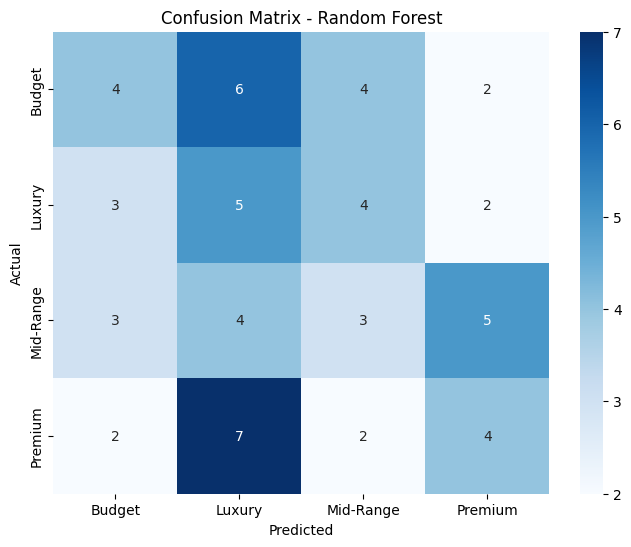

{'Accuracy': 0.26666666666666666,
 'AUC Score': 0.54243265993266,
 'Precision': 0.2765345765345765,
 'Recall': 0.26666666666666666,
 'F1 Score': 0.26600529100529097,
 'MCC Score': 0.026258455763644186}

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_clf.fit(X_train_scaled, y_train)

evaluate_model('Random Forest', rf_clf, X_test_scaled, y_test)

## 9. Model 6 - Ensemble: XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_scaled, y_train)

evaluate_model('XGBoost', xgb_clf, X_test_scaled, y_test)

ModuleNotFoundError: No module named 'xgboost'

## 10. Model Comparison Summary

In [ ]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)
print("\n" + "=" * 80)
print("  MODEL COMPARISON - ALL 6 CLASSIFIERS")
print("=" * 80)
print(comparison_df.to_string())
print("=" * 80)

In [ ]:
# Visualize the comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Comparison Across All Metrics', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']
colors = ['#2196F3', '#4CAF50', '#FF9800', '#E91E63', '#9C27B0', '#00BCD4']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 3][idx % 3]
    values = [results[model][metric] for model in results]
    model_names = list(results.keys())
    bars = ax.barh(model_names, values, color=color, alpha=0.8)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlim(0, 1.05)
    for bar, val in zip(bars, values):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Identify the best model for each metric
print("\nBest Model per Metric:")
print("-" * 40)
for metric in metrics:
    best_model = max(results, key=lambda m: results[m][metric])
    best_value = results[best_model][metric]
    print(f"  {metric:12s} : {best_model} ({best_value:.4f})")

# Overall best model (by average rank across all metrics)
print("\n" + "=" * 40)
avg_scores = {model: np.mean(list(vals.values())) for model, vals in results.items()}
best_overall = max(avg_scores, key=avg_scores.get)
print(f"Best Overall Model: {best_overall} (avg score: {avg_scores[best_overall]:.4f})")
print("=" * 40)